# Computer Vision - MNIST &amp; Fashion MNIST
This notebook shows an approach to a *Supervised Learning - Multiclass Classification* task within the field of *Computer Vision*. More information about the datasets used in this notebook can be found below.

## MNIST
The MNIST dataset contains 70,000 small images of labeled handwritten digits, from *0 - 9*. This problem is often called as the "Hello World" of *Machine Learning* because anyone who learns Machine Learning tackles this problem at any time.  

Further information about the dataset can be found in the following webpages:  
[MNIST - Yann LeCun](http://yann.lecun.com/exdb/mnist/)  
[MNIST 784 - OpenML](https://www.openml.org/d/554)  
[MNIST - Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/mnist)  

## Fashion MNIST
The *Fashion-MNIST* dataset contains 70,000 labeled article images. Each image is a 28×28 grayscale image, associated with a label from 10 classes. 

Further information about the dataset can be found in the following webpages:  
[Fashion MNIST - Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)  
[Fashion MNIST - Zalando Research](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/)  
[Fashion MNIST - Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/fashion_mnist)  


*All the datasets used along this notebook are open sourced.*

## Libraries & Modules

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

#Modelling
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression

# Testing
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_auc_score

%matplotlib inline

## User Defined Functions

In [20]:
def plot_images(images_data,labels_data):
    fig, axes = plt.subplots(1, 8,figsize=(14,2))
    images_and_labels = list(zip(images_data, labels_data))
    for ax, (image, label) in zip(axes, images_and_labels[:8]):
        image = image.reshape(28,28)
        ax.set_axis_off()
        ax.imshow(image, cmap = 'binary')
        ax.set_title(f'Label: {label}')

## MNIST
The classification task will be tackled with three models/techniques:

- Dense Fully Connected Neural Network
- Convolutional Network
    - Uncompressed Images
    - Compressed Images using PCA

Each approach listed above has advantages &amp; disadvantages, that will be explained further in the *Error Analysis* section.

### Data Loading
Scikit Learn provides a function in Datasets module which can download multiple open-sourced datasets. The data will be downloaded and stored in *'~/scikit_learn_data'* by default, but, in this case, we have provided a custom directory.

In [6]:
if not os.path.isdir('./data'):
    os.mkdir('./data')
else:
    pass

mnist = fetch_openml('mnist_784', data_home = './data/MNIST')
mnist.keys()

Ok


KeyboardInterrupt: 

The fetched data has multiple keys, however we will use `data` &amp; `target` which contain images and labels, respectively. The `data` corresponds to *70,000 example*s of *28x28* and will be stored in variable `X`. The `target` corresponds to a column vector which contains the 70,000 corresponding labels.  

\begin{equation*}
X = 
\left\{
\quad
\begin{bmatrix}
x_{0,0} & \cdots & x_{0,27}\\
\vdots & \vdots & \vdots\\
x_{27,0} & \cdots & x_{27,27}\\
\end{bmatrix}_{28\times 28}
\quad
\right\}_{70000}
\quad
\quad
\quad
\quad
y = 
\begin{bmatrix}
\quad
y_{0,0}\\
\vdots\\
\vdots\\
\vdots\\
\vdots\\
\vdots\\
y_{69999,0}\\
\end{bmatrix}_{7000\times 1}
\end{equation*}



\**Numpy* takes `y` variable as a *rank-1 array*, that is *(70000,)*, then it will be reshaped to *(70000,1)*.

In [22]:
X, y = mnist['data'], mnist['target']
y.reshape(y.shape[0],1)
y = y.astype(np.uint8)
print(f'The dataset has {X.shape[0]} images of {X.shape[1]} pixels, that is 28x28 images.')

The dataset has 70000 images of 784 pixels, that is 28x28 images.


Some examples of the images are shown below.

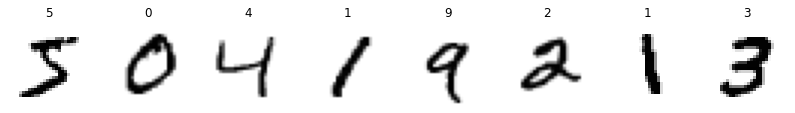

In [23]:
plot_images(X,y)

The balance of different classes in the `target` variable will be checked as follows.

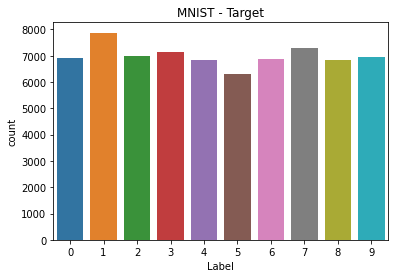

In [24]:
sns.countplot(y)
plt.title('MNIST - Target')
plt.xlabel('Label')
plt.show()

The dataset will be split into *Train &amp; Test sets*, the *Test set* will correspond to the *20%* of the total examples.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

### Modelling
This phase will be tackled following two approaches:  
- Logistic Regression
- Artificial Neural Network
- Convolutional Neural Network

#### Logistic Regression Classifier

In [8]:
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 350, random_state = 0, verbose = 2, n_jobs = -1)
logistic.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


LogisticRegression(max_iter=350, n_jobs=-1, random_state=0, verbose=2)

In [9]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(logistic, X,y,random_state = 0, n_jobs=-1,
                                                                     return_times = True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

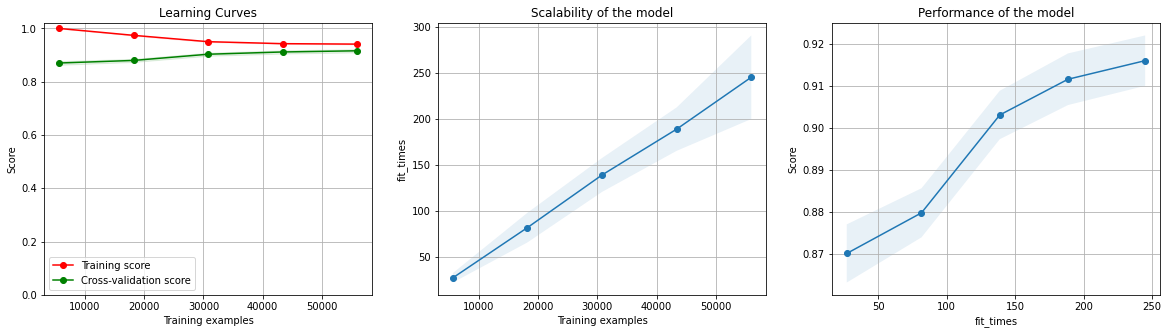

In [10]:
axes = None
ylim = (0,1.02)
if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title('Learning Curves')
if ylim is not None:
    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                 fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")
plt.show()

In [11]:
y_pred = logistic.predict(X_test)
y_score = logistic.predict_proba(X_test)
acc = round(accuracy_score(y_test, y_pred),3)
auc = round(roc_auc_score(y_test,y_score,average='weighted',multi_class='ovr'),3)
print(f'Logistic Regression Classifier\nAccuracy: {acc}\nROC AUC: {auc}')

Logistic Regression Classifier
Accuracy: 0.92
ROC AUC: 0.993


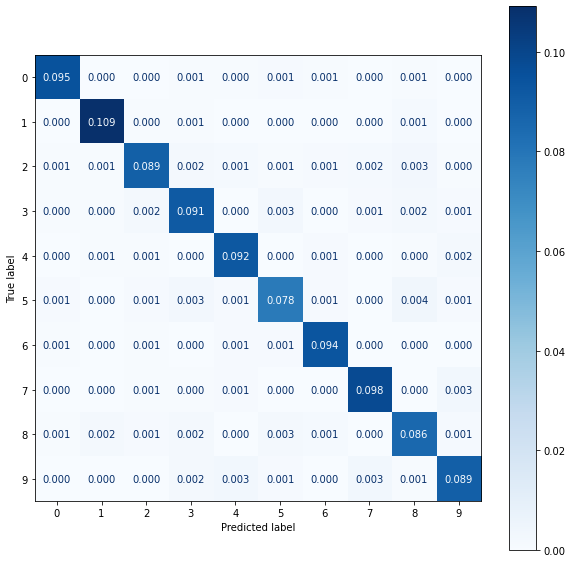

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = logistic, X = X_test, y_true = y_test, ax = ax, 
                      labels = np.unique(y), normalize = 'all', cmap = 'Blues', values_format = '.3f')
plt.show()

*Logistic Regression* showed a good performance, however it did not converge. The lack of convergence gives us an idea that probably the data cannot be fit by a *Logistic Regression* model. There are multiple ways to solve the convergence issue, but let's move further and try *Artificial Neural Network*.

#### Artificial Neural Network

In [13]:
X_train /= 255.0
X_test /= 255.0

In [14]:
X_train = X_train.reshape(X_train.shape[0],28,28)

In [15]:
X_test = X_test.reshape(X_test.shape[0],28,28)

In [16]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9245
Epoch 2/15
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1163 - accuracy: 0.9655
Epoch 3/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 4/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9822
Epoch 5/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9854
Epoch 6/15
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 7/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9910
Epoch 8/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.9933
Epoch 9/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 10/15
1750/1750 [==============================] - 4s 2ms/step - loss: 0.015

In [20]:
model.evaluate(X_test, y_test)[-1]

438/438 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9795


0.9794999957084656

The current Neural Network did not perform as well on test data as it did on training data. The next approach will improve its performance on both, training and test data.

### Fashion MNIST
An approach to object classification.

### Data Loading

In [32]:
fashion_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

Some examples of the images are shown below.

In [33]:
plot_images(train_images,train_labels)

10000

The balance of different classes in the dataset will be checked as follows.

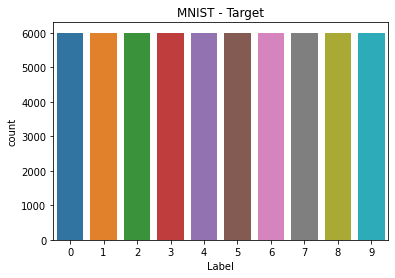

In [35]:
sns.countplot(train_labels)
plt.title('MNIST - Target')
plt.xlabel('Label')
plt.show()

The data will be normalized as follows.

In [36]:
train_images= train_images / 255.0
test_images= test_images/255.0

#### Convolutional Neural Network

In [41]:
train_images=train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

A callback will be defined with a to stop the fit of the model once 99.8% accuracy has been reached.

In [43]:
class accuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') > 0.998:
            self.model.stop_training = True
            print("\nReached 99.8% accuracy so cancelling training!\n")

Train the model.

In [44]:
accCallback = accuracyCallback()
model.fit(train_images, train_labels, epochs = 20, callbacks = [accCallback])

Epoch 1/20
1875/1875 [==============================] - 100s 54ms/step - loss: 0.4362 - accuracy: 0.8417
Epoch 2/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2915 - accuracy: 0.8928
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2476 - accuracy: 0.9082
Epoch 4/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2144 - accuracy: 0.9209
Epoch 5/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1878 - accuracy: 0.9301
Epoch 6/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1639 - accuracy: 0.9388
Epoch 7/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1437 - accuracy: 0.9463
Epoch 8/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1269 - accuracy: 0.9515
Epoch 9/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1097 - accuracy: 0.9588
Epoch 10/20
1875/1875 [==============================] - 74s 4

In [45]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.5446 - accuracy: 0.9108


[0.5446352958679199, 0.9107999801635742]